# **Sentiment Analysis** 


### **EDA - Data Cleaning**

In [ ]:
import json
import pandas as pd

In [ ]:
data = []
errors = [] # because some lines are not properly formatted

In [ ]:
with open('Health_and_Personal_Care_5.json', 'r') as file:
    for line_number, line in enumerate(file, 1):
        try:
            json_object = json.loads(line) # in this file, each line is an object
            data.append(json_object)
        except json.JSONDecodeError as e:
            errors.append((line_number, str(e)))

In [ ]:
print("Encountered errors on lines:", errors)

Encountered errors on lines: [(25945, 'Unterminated string starting at: line 1 column 333 (char 332)')]


In [ ]:
df = pd.DataFrame(data)
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      25944 non-null  object 
 1   asin            25944 non-null  object 
 2   reviewerName    25774 non-null  object 
 3   helpful         25944 non-null  object 
 4   reviewText      25944 non-null  object 
 5   overall         25944 non-null  float64
 6   summary         25944 non-null  object 
 7   unixReviewTime  25944 non-null  int64  
 8   reviewTime      25944 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
# row number
df.shape[0]

25944

#### We create a new column called "label" that determines the positive sentiment, which is based on overall rating of 4 or higher. Anything lower is 0 i.e. negative sentiment

In [ ]:
df['label'] = df['overall'].apply(lambda x: '1' if x >= 4 else '0')
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,label
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011",1
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4.0,Small & may need to encourage battery,1329523200,"02 18, 2012",1
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4.0,Very good but not great,1275955200,"06 8, 2010",1
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4.0,great addition to your purse,1202428800,"02 8, 2008",1
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5.0,Very nice and convenient.,1313452800,"08 16, 2011",1


In [ ]:
# handle 'reviewTime'

df['formatted_reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')
df['formatted_reviewTime'] = df['formatted_reviewTime'].dt.strftime('%Y-%m-%d')

df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,label,formatted_reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011",1,2011-01-05
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4.0,Small & may need to encourage battery,1329523200,"02 18, 2012",1,2012-02-18
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4.0,Very good but not great,1275955200,"06 8, 2010",1,2010-06-08
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4.0,great addition to your purse,1202428800,"02 8, 2008",1,2008-02-08
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5.0,Very nice and convenient.,1313452800,"08 16, 2011",1,2011-08-16


In [ ]:
# transform reviewTime to datetime
df['formatted_reviewTime'] = pd.to_datetime(df['formatted_reviewTime'])


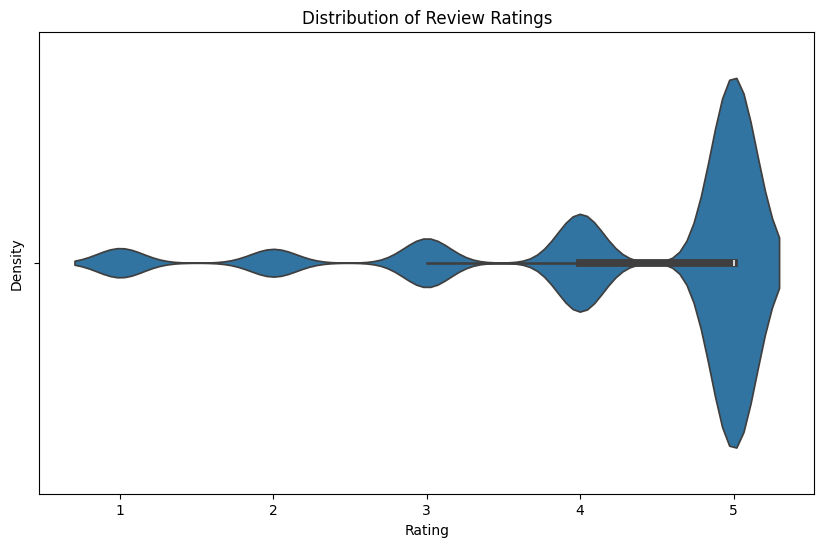

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# distribution of overall
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='overall', data=df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

**Inference:** Most reviews have ratings of 5 which means customers are very happy

In [ ]:
# handle 'helpful'

def calculate_ratio(x):
    if x[1] == 0:  # exception when 0 appears
        return 0
    return x[0]/x[1]

df['helpful_ratio'] = df['helpful'].apply(calculate_ratio)
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,label,formatted_reviewTime,helpful_ratio
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011",1,2011-01-05,1.000000
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4.0,Small & may need to encourage battery,1329523200,"02 18, 2012",1,2012-02-18,1.000000
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4.0,Very good but not great,1275955200,"06 8, 2010",1,2010-06-08,0.974026
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4.0,great addition to your purse,1202428800,"02 8, 2008",1,2008-02-08,0.933333
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5.0,Very nice and convenient.,1313452800,"08 16, 2011",1,2011-08-16,1.000000


<ipython-input-17-b164e8a96d9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['helpful_ratio'], bins=10, kde=True)


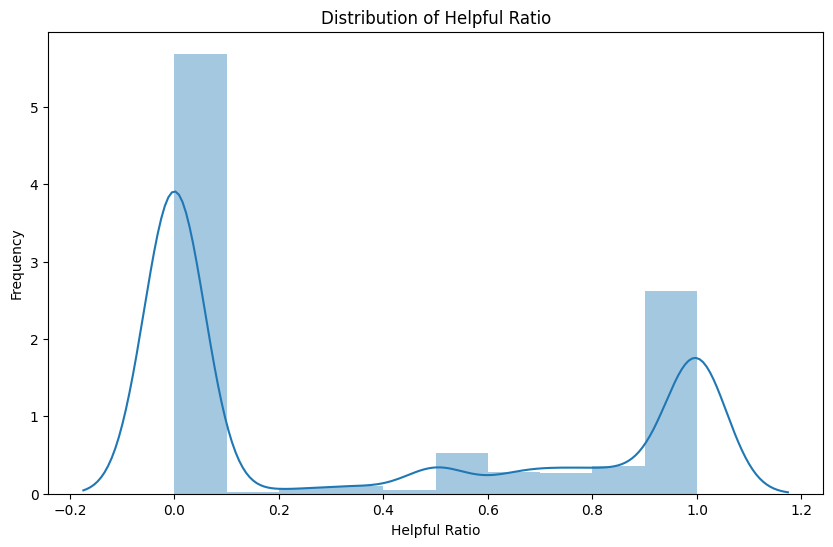

In [ ]:
# the distribution of helpful_ratio
plt.figure(figsize=(10, 6))
sns.distplot(df['helpful_ratio'], bins=10, kde=True)
plt.title('Distribution of Helpful Ratio')
plt.xlabel('Helpful Ratio')
plt.ylabel('Frequency')
plt.show()

**INFERENCE:** Most reviews are not considered to be helpful

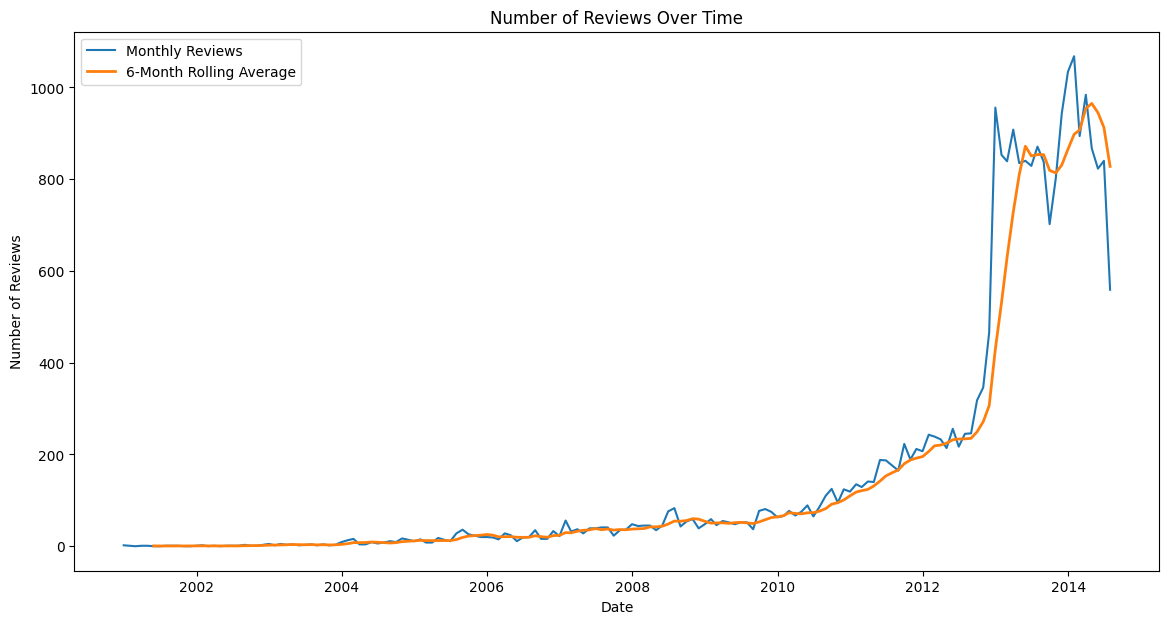

In [ ]:
# 2. number of reviews over time
reviews_per_month = df.set_index('formatted_reviewTime').resample('M').size()
rolling_reviews_per_month = reviews_per_month.rolling(window=6).mean()

plt.figure(figsize=(14, 7))
plt.plot(reviews_per_month, label='Monthly Reviews')
plt.plot(rolling_reviews_per_month, label='6-Month Rolling Average', linewidth=2)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

**The number of reviews have spiked suddenly after 2012 and kept increasing over the years. It reached a peak in 2014 before showing signs of a decline**

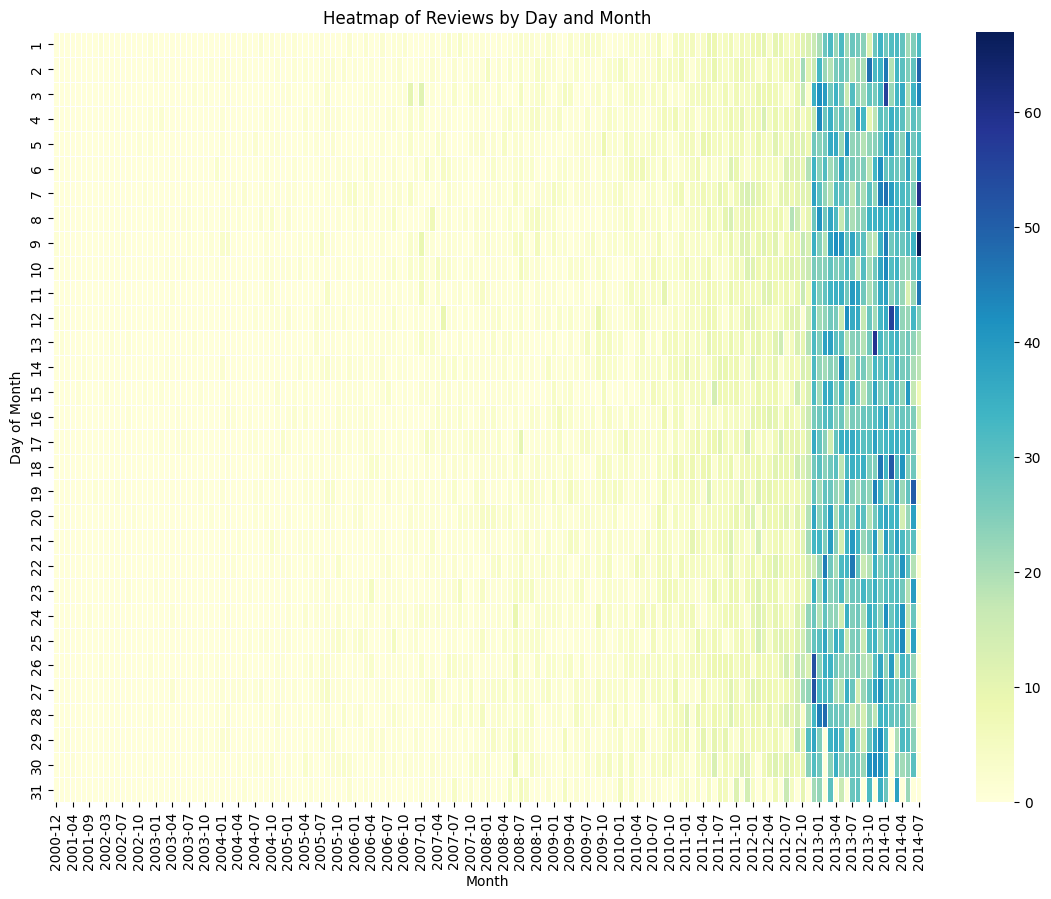

In [ ]:
# heatmap of reviews by Day and Month
df['year_month'] = df['formatted_reviewTime'].dt.to_period('M')
df['day'] = df['formatted_reviewTime'].dt.day

heatmap_data = df.groupby(['day', 'year_month']).size().unstack().fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Reviews by Day and Month')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.show()

## **TEXT VECTORISATION**
TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def compute_tfidf(reviewText):
    """
    Computes the TF-IDF matrix for the given list of reviews.

    Parameters:
    reviewText (list of str): A list of review texts.

    Returns:
    pd.DataFrame: A DataFrame containing the TF-IDF scores.
    """
    # Initialize TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Fit and transform the reviewText
    tfidf_matrix = vectorizer.fit_transform(reviewText)

    # Convert to array (optional, for easier inspection)
    tfidf_array = tfidf_matrix.toarray()

    # Get feature names (terms)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame for a better overview
    df_tfidf = pd.DataFrame(tfidf_array, columns=feature_names)

    return df_tfidf


tfidf_df = compute_tfidf(df['reviewText'])
#Summarize the most frequent and significant terms across all reviews. This helps in understanding common themes and topics discussed by customers.
term_sums = tfidf_df.sum().sort_values(ascending=False)

# Display the top terms
print(term_sums.head(40))

product      676.204747
good         594.413688
use          589.263403
great        587.228673
like         537.615510
just         463.239224
works        423.430025
really       388.502269
used         382.727774
work         374.904420
time         371.082648
price        368.952708
don          357.987767
ve           342.679373
day          338.914760
better       334.170204
using        329.526867
does         314.571953
years        295.834208
buy          288.896841
love         284.181753
bought       283.098934
taking       277.797887
little       271.132669
recommend    266.917195
batteries    263.561753
best         258.156378
long         253.505800
feel         252.352390
need         251.589236
did          247.819824
easy         246.274169
34           243.238423
help         239.170494
tried        237.956951
skin         237.749636
taste        233.512411
clean        230.724545
brush        225.620742
amazon       212.314582
dtype: float64


**INFERENCE: Words like "great," "good," "like," "very," and "well" have high TF-IDF scores, indicating that these terms are frequently used in your reviews and are significant. This suggests that these reviews contain positive sentiments. Additionally, Batteries seemed to be an important aspect of the reviews too**

Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def compute_bag_of_words(reviewText):
    """
    Computes the Bag of Words (BoW) matrix for the given list of reviews.

    Parameters:
    reviewText (list of str): A list of review texts.

    Returns:
    pd.DataFrame: A DataFrame containing the BoW counts.
    """
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the reviewText
    bow_matrix = vectorizer.fit_transform(reviewText)

    # Convert to array (optional, for easier inspection)
    bow_array = bow_matrix.toarray()

    # Get feature names (terms)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame for a better overview
    df_bow = pd.DataFrame(bow_array, columns=feature_names)

    return df_bow

bow_df = compute_bag_of_words(df['reviewText'])

term_counts = bow_df.sum().sort_values(ascending=False)
print(term_counts.head(40))

product      9233
use          9062
like         8367
just         7286
good         7214
great        6447
used         5056
time         5054
don          4912
ve           4691
really       4659
day          4639
using        4242
work         4144
works        4062
better       3972
does         3631
years        3586
price        3394
little       3233
taking       3155
did          2997
bought       2892
need         2835
tried        2779
feel         2732
long         2730
buy          2632
best         2623
recommend    2602
skin         2586
way          2480
water        2457
try          2417
help         2412
clean        2403
amazon       2382
know         2334
love         2315
make         2279
dtype: int64


Use, good, great, price are some of the key words used in product reviews

N-Grams (bigrams)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def compute_ngrams(reviewText, ngram_range=(2, 2)):
    """
    Computes the n-gram matrix for the given list of reviews.

    Parameters:
    reviewText (list of str): A list of review texts.
    ngram_range (tuple): The lower and upper boundary of the range of n-values for different n-grams to be extracted.

    Returns:
    pd.DataFrame: A DataFrame containing the n-gram counts.
    """
    stopwords_list = list(ENGLISH_STOP_WORDS)

    # Initialize CountVectorizer with ngram_range and stopwords removal
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords_list)
    # Fit and transform the reviewText
    ngram_matrix = vectorizer.fit_transform(reviewText)

    # Convert to array (optional, for easier inspection)
    ngram_array = ngram_matrix.toarray()

    # Get feature names (terms)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame for a better overview
    df_ngrams = pd.DataFrame(ngram_array, columns=feature_names)

    return df_ngrams

ngrams_df = compute_ngrams(df['reviewText'], ngram_range=(2, 2))

# Display the n-grams DataFrame
print(ngrams_df)

# Sum the counts of each n-gram to get total counts for each word
word_counts = ngrams_df.sum(axis=0)

# Sort the word counts in descending order to find the most frequent words
most_frequent_words = word_counts.sort_values(ascending=False)

print(most_frequent_words.head(20))

       00 00  00 000  00 10  00 100  00 12  00 15  00 2009  00 28  00 30  \
0          0       0      0       0      0      0        0      0      0   
1          0       0      0       0      0      0        0      0      0   
2          0       0      0       0      0      0        0      0      0   
3          0       0      0       0      0      0        0      0      0   
4          0       0      0       0      0      0        0      0      0   
...      ...     ...    ...     ...    ...    ...      ...    ...    ...   
25939      0       0      0       0      0      0        0      0      0   
25940      0       0      0       0      0      0        0      0      0   
25941      0       0      0       0      0      0        0      0      0   
25942      0       0      0       0      0      0        0      0      0   
25943      0       0      0       0      0      0        0      0      0   

       00 300  ...  zyrtec night  zyrtec particular  zyrtec stopped  \
0           0  .

## Classification Algorithms
1. We perform feature extaction methods include BoW, TF IDF, and bigrams
2. Then train 3 types of models: logistic regression, random forest, svc
3. Evaluate each model performance

### **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import time

# Ensure df is defined with 'reviewText' and 'label' columns
if 'reviewText' not in df.columns or 'label' not in df.columns:
    raise KeyError("DataFrame must contain 'reviewText' and 'label' columns.")

# Extract review texts and labels
reviewText = df['reviewText'].tolist()
labels = df['label'].tolist()

# Encode labels to ensure they are integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Debug: Print unique labels
print(f"Unique labels: {set(labels)}")

# Define feature extraction methods
tfidf = ('tfidf', TfidfVectorizer())
bow = ('bow', CountVectorizer())
ngrams = ('ngrams', CountVectorizer(ngram_range=(1, 2)))

# Combine feature extraction methods
combined_features = FeatureUnion([tfidf, bow, ngrams])

# Function to create a pipeline and train a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, eval_set=None):
    start_time = time.time()
    print(f"Training {model.__class__.__name__}...")

    if isinstance(model, XGBClassifier) and eval_set is not None:
        # Create a pipeline for feature extraction
        feature_pipeline = Pipeline([('features', combined_features)])
        X_train_transformed = feature_pipeline.fit_transform(X_train)
        X_test_transformed = feature_pipeline.transform(X_test)
        X_val_transformed = feature_pipeline.transform(eval_set[0][0])

        eval_set_transformed = [(X_val_transformed, eval_set[0][1])]

        model.set_params(early_stopping_rounds=10, num_class=len(set(y_train)))
        model.fit(X_train_transformed, y_train, eval_set=eval_set_transformed)

        y_pred = model.predict(X_test_transformed)
    else:
        pipeline = Pipeline([
            ('features', combined_features),
            ('classifier', model)
        ])

        # Fit the model
        print(f"Fitting {model.__class__.__name__}...")
        pipeline.fit(X_train, y_train)

        # Make predictions
        print(f"Predicting with {model.__class__.__name__}...")
        y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC: {auc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*60 + "\n")


    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix for the Model")
    plt.show()

    end_time = time.time()
    print(f"Completed {model.__class__.__name__} in {(end_time - start_time)/60:.2f} minutes.\n")

# Split the data into training and testing sets with stratification
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(reviewText, labels, test_size=0.25, random_state=42, stratify=labels)
print("Data split completed.")

# Further split the training data to create a validation set for XGBoost
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


Unique labels: {0, 1}
Splitting data...
Data split completed.


Training LogisticRegression...
Fitting LogisticRegression...
Predicting with LogisticRegression...
Model: LogisticRegression
Accuracy: 0.87
AUC: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58      1192
           1       0.89      0.95      0.92      5294

    accuracy                           0.87      6486
   macro avg       0.79      0.73      0.75      6486
weighted avg       0.86      0.87      0.86      6486


Confusion Matrix:
[[ 599  593]
 [ 266 5028]]




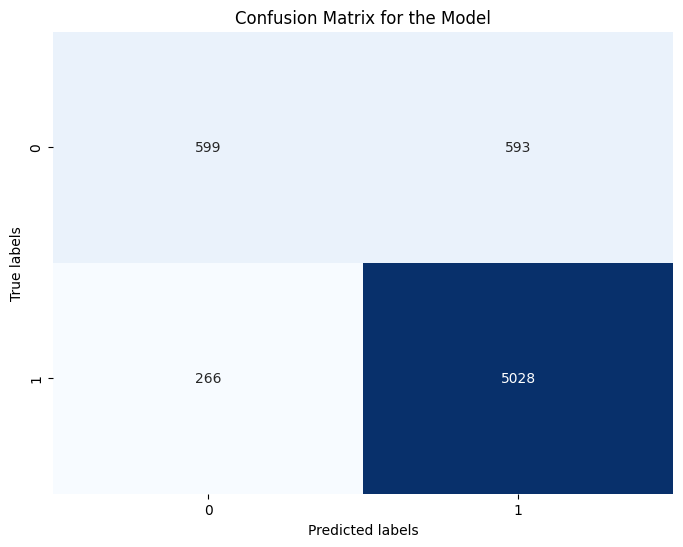

Completed LogisticRegression in 1.52 minutes.



In [ ]:
# Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
train_and_evaluate_model(logistic_regression_model, X_train, X_test, y_train, y_test)


**Accuracy**: The accuracy of the model is 85%, meaning it correctly predicts sentiment in 85% of cases.

**AUC**: The Area Under the ROC Curve (AUC) is 0.67, indicating moderate predictive performance.

The model shows high precision (0.88) but lower recall (0.95) for positive sentiment (class 1). This means it accurately identifies positives but may miss some instances. Consider balancing precision and recall based on the cost of false positives versus false negatives

**Confusion Matrix**: Shows the counts of true positive, false positive, true negative, and false negative predictions. The model correctly predicts a majority of positive sentiment (1) instances but has more difficulty with negative sentiment (0) instances.


Overall, the model performs well in predicting positive sentiment but has room for improvement in predicting negative sentiment


### **RANDOM FOREST**

Performing grid search for RandomForestClassifier...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best hyperparameters for RandomForestClassifier: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Training RandomForestClassifier...
Fitting RandomForestClassifier...
Predicting with RandomForestClassifier...
Model: RandomForestClassifier
Accuracy: 0.82
AUC: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.04      0.08      1192
           1       0.82      1.00      0.90      5294

    accuracy                           0.82      6486
   macro avg       0.88      0.52      0.49      6486
weighted avg       0.84      0.82      0.75      6486


Confusion Matrix:
[[  50 1142]
 [   3 5291]]




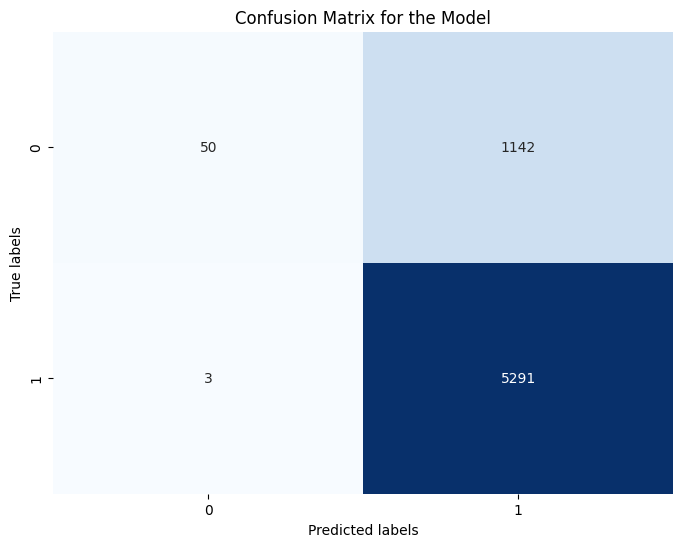

Completed RandomForestClassifier in 1.16 minutes.



In [ ]:
# Random Forest with Grid Search
param_grid = {
    'classifier__n_estimators': [50, 100],  # Reduced range for faster testing
    'classifier__max_depth': [10, None],    # Reduced range for faster testing
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    Pipeline([
        ('features', combined_features),
        ('classifier', RandomForestClassifier())
    ]),
    param_grid,
    cv=3,  # Reduced number of folds for faster testing
    scoring='accuracy',
    n_jobs=-1,
    verbose=2  # Add verbosity for tracking progress
)

print("Performing grid search for RandomForestClassifier...")
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
print(f"Best hyperparameters for RandomForestClassifier: {grid_search.best_params_}")
train_and_evaluate_model(best_rf_model.named_steps['classifier'], X_train, X_test, y_train, y_test)


**Accuracy**: The model achieved an accuracy of 83%, indicating it correctly predicts sentiment in 83% of cases.

**AUC**: The Area Under the ROC Curve (AUC) is 0.50, which suggests the model's predictive performance is no better than random chance.
The model has a precision of 0.83 and recall of 1.00 for class 1 (positive sentiment), indicating high precision but possibly overfitting or an imbalanced dataset. This high recall suggests it captures all positive instances but at the cost of potentially higher false positives. Consider evaluating model performance with a balanced dataset or adjusting the model to avoid overfitting

**Confusion Matrix**: Shows the counts of true positive, false positive, true negative, and false negative predictions. The model correctly predicts a majority of positive sentiment (1) instances but performs poorly in identifying negative sentiment (0) instances


In summary, while the model performs well in predicting positive sentiment, its performance in identifying negative sentiment is subpar, as evidenced by the low recall and precision values for class 0.


### **SVC CLASSIFICATION**

Training SVC...
Fitting SVC...
Predicting with SVC...
Model: SVC
Accuracy: 0.83
AUC: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.83      1.00      0.91      1008

    accuracy                           0.83      1212
   macro avg       0.42      0.50      0.45      1212
weighted avg       0.69      0.83      0.76      1212


Confusion Matrix:
[[   0  204]
 [   0 1008]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


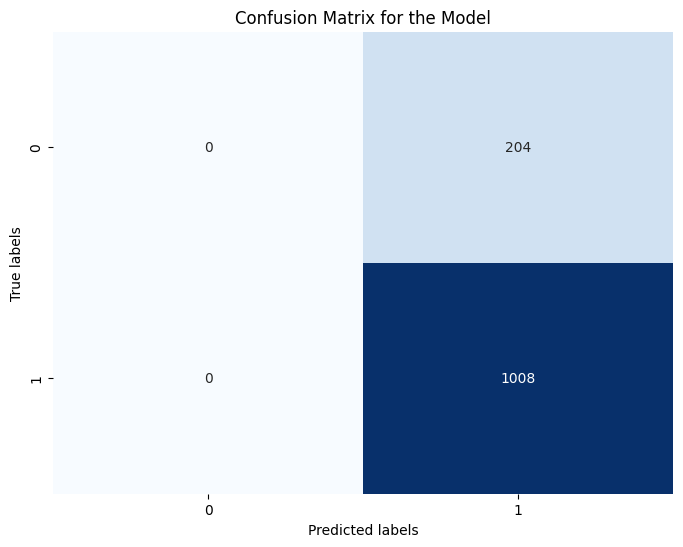

Completed SVC in 1.49 minutes.



In [ ]:
from sklearn.svm import SVC

# Train and evaluate SVM
svm_model = SVC(probability=True)
train_and_evaluate_model(svm_model, X_train, X_test, y_train, y_test)


**Accuracy**: The model achieved an accuracy of 83%, indicating it correctly predicts sentiment in 83% of cases.

**AUC**: The Area Under the ROC Curve (AUC) is 0.50, which suggests the model's predictive performance is no better than random chance.
The SVC model shows a precision of 0.83 and recall of 1.00 for class 1 (positive sentiment), indicating high precision but potential overfitting or an imbalanced dataset. The extremely low recall for class 0 (negative sentiment) suggests the model struggles to identify negative instances, resulting in a high false negative rate. Consider evaluating model performance with a balanced dataset or adjusting the model to improve performance on negative sentiment

**Confusion Matrix**: Shows the counts of true positive, false positive, true negative, and false negative predictions. The model correctly predicts a majority of positive sentiment (1) instances but fails to identify negative sentiment (0) instances effectively, as indicated by the high false negative count and low recall for class 0.

In summary, while the model performs well in predicting positive sentiment, its performance in identifying negative sentiment is extremely poor, as evidenced by the low recall and precision values for class 0.


**Logistic regression outperforms all other models with the highest accuracy of 85%.**

## **Saving the modified dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewerID            25944 non-null  object        
 1   asin                  25944 non-null  object        
 2   reviewerName          25774 non-null  object        
 3   helpful               25944 non-null  object        
 4   reviewText            25944 non-null  object        
 5   overall               25944 non-null  float64       
 6   summary               25944 non-null  object        
 7   unixReviewTime        25944 non-null  int64         
 8   reviewTime            25944 non-null  object        
 9   label                 25944 non-null  object        
 10  formatted_reviewTime  25944 non-null  datetime64[ns]
 11  helpful_ratio         25944 non-null  float64       
 12  year_month            25944 non-null  period[M]     
 13  day             

In [ ]:
# see how many nulls
df.isnull().sum()

reviewerID                0
asin                      0
reviewerName            170
helpful                   0
reviewText                0
overall                   0
summary                   0
unixReviewTime            0
reviewTime                0
label                     0
formatted_reviewTime      0
helpful_ratio             0
year_month                0
day                       0
dtype: int64

In [ ]:
# handle nulls in reviewerName
df['reviewerName'].fillna('NA', inplace=True)

In [ ]:
df2 = df.copy()

In [ ]:
# handle 'helpful'

def calculate_ratio(x):
    if x[1] == 0:  # exception when 0 appears
        return 0
    return x[0]/x[1]

df2['helpful_ratio'] = df2['helpful'].apply(calculate_ratio)
df2.head(5)

In [ ]:
# handle 'reviewTime'

df2['formatted_reviewTime'] = pd.to_datetime(df2['reviewTime'], format='%m %d, %Y')
df2['formatted_reviewTime'] = df2['formatted_reviewTime'].dt.strftime('%Y-%m-%d')

df2.head(5)

In [ ]:
# write the data to a csv file
df2.to_csv('Amazon_Healthcare_Cleaned.csv', index=False, encoding='utf-8')